In [16]:
import os
import numpy as np
from io import BytesIO
import tempfile
from glob import glob

#%matplotlib notebook
import matplotlib.pyplot as plt
import pandas as pd
import sqlite3
import lsst.daf.persistence as dafPersist
import lsst.afw.display as afwDisplay
import lsst.afw.image as afwImage
import lsst.afw.fits as afwFits
import lsst.geom
import lsst.alert.packet
afwDisplay.setDefaultBackend('matplotlib')
import matplotlib.ticker as plticker
from astropy.visualization import (ZScaleInterval, SqrtStretch, ImageNormalize)
from astropy.utils.console import ProgressBar
from astropy.nddata import CCDData

In [2]:
schema = lsst.alert.packet.Schema.from_file()

In [9]:
!ls /project/morriscb/src/ap_verify_hits2015/DM-25229/alerts

41091501.avro  41131949.avro  41175836.avro  41232425.avro  41364914.avro
41091503.avro  41131950.avro  41175837.avro  41232426.avro  41364915.avro
41091504.avro  41131951.avro  41175838.avro  41232427.avro  41364916.avro
41091505.avro  41131952.avro  41175839.avro  41232428.avro  41364917.avro
41091506.avro  41131953.avro  41175840.avro  41232429.avro  41364918.avro
41091507.avro  41131954.avro  41175841.avro  41232430.avro  41364919.avro
41091508.avro  41131955.avro  41175842.avro  41232431.avro  41364920.avro
41091509.avro  41131956.avro  41175843.avro  41232432.avro  41364921.avro
41091510.avro  41131957.avro  41175844.avro  41232433.avro  41364922.avro
41091511.avro  41131958.avro  41175845.avro  41232434.avro  41364923.avro
41091512.avro  41131959.avro  41175846.avro  41232435.avro  41364924.avro
41091513.avro  41131960.avro  41175847.avro  41232436.avro  41364925.avro
41091514.avro  41131962.avro  41175848.avro  41232437.avro  41364926.avro
41091515.avro  41132101.avro  41175849

In [5]:
alert_files = glob('/project/morriscb/src/ap_verify_hits2015/DM-25229/alerts/*.avro')

In [6]:
len(alert_files)

5020

let's count diaSources:

In [10]:
REPO = '/project/morriscb/src/ap_verify_hits2015/DM-25229'
connection = sqlite3.connect(f'{REPO}/association.db')


In [11]:
pd.read_sql_query('select count(diaSourceId) from diaSource;', connection)


,count(diaSourceId)
0,675419


In [62]:
pd.read_sql_query('select * from diaSource limit 1;', connection)


,diaSourceId,ccdVisitId,diaObjectId,ssObjectId,parentDiaSourceId,prv_procOrder,ssObjectReassocTime,midPointTai,ra,raErr,...,iyyPSF,ixyPSF,extendedness,spuriousness,flags,pixelId,filterName,filterId,isDipole,bboxSize
0,176827016211857907,41170748,176827016211857907,0,0,0,None,57072.135046,150.124692,None,...,2.499509,-0.223166,None,None,25299404,0,g,1,0,17


In [75]:
test = pd.read_sql_query('select ccdVisitId, midpointTAI from diaSource;', connection)


In [76]:
unique_id_time = test.apply(lambda x: tuple(x),axis=1).unique()

In [86]:
ids = [x[0] for x in unique_id_time]
times = [x[1] for x in unique_id_time]


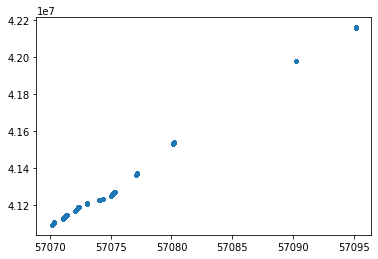

In [88]:
plt.plot(times,ids,'.')

In [97]:
s = np.argsort(ids)

In [98]:
s

array([3979, 3990, 3803, ..., 2944, 2951, 2958])

In [99]:
dt = np.diff(np.array(times)[s])

In [102]:
dt.min()

0.0

In [103]:
np.sum(dt < 0)

0

In [ ]:
# so sorting by id gives the times in order

In [13]:
avro_file = alert_files[0]

In [14]:
with open(f'{avro_file}','rb') as f:
    writer_schema, data = schema.retrieve_alerts(f)
    print(avro_file.split('/')[-1], len(data))

41098723.avro 121


In [54]:
def read_cutout_images(alert):
    
    
    with BytesIO(alert['cutoutDifference']) as bytesIO:
        cutoutDifference = CCDData.read(bytesIO, format="fits")
        
    with BytesIO(alert['cutoutTemplate']) as bytesIO:
        cutoutTemplate = CCDData.read(bytesIO, format="fits")
   
    return cutoutDifference, cutoutTemplate
    

def plot_cutout_images(alert):
    
    cutoutDifference, cutoutTemplate = read_cutout_images(alert)
   
    plt.figure()
    plt.imshow(cutoutDifference.data)
    plt.figure()
    plt.imshow(cutoutTemplate.data)
    
    #return diffExposure

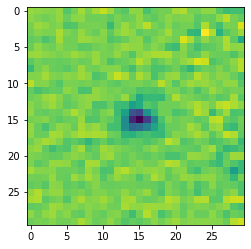

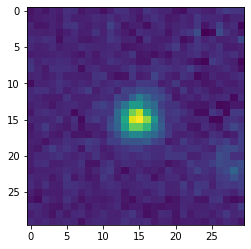

In [55]:
plot_cutout_images(data[2])

In [31]:
data[0].keys()

dict_keys(['alertId', 'diaSource', 'prvDiaSources', 'prvDiaForcedSources', 'prvDiaNondetectionLimits', 'diaObject', 'ssObject', 'cutoutDifference', 'cutoutTemplate'])

In [50]:
data[1]['diaObject']

{'diaObjectId': 177219039351799969,
 'ra': 155.79172955145793,
 'decl': -4.6502531121211925,
 'raErr': nan,
 'declErr': nan,
 'ra_decl_Cov': nan,
 'radecTai': 57090.25109844361,
 'pmRa': nan,
 'pmDecl': nan,
 'parallax': nan,
 'pmRaErr': nan,
 'pmDeclErr': nan,
 'parallaxErr': nan,
 'pmRa_pmDecl_Cov': nan,
 'pmRa_parallax_Cov': nan,
 'pmDecl_parallax_Cov': nan,
 'pmParallaxLnL': nan,
 'pmParallaxChi2': nan,
 'pmParallaxNdata': 0,
 'uPSFluxMean': nan,
 'uPSFluxMeanErr': nan,
 'uPSFluxSigma': nan,
 'uPSFluxChi2': nan,
 'uPSFluxNdata': 0,
 'gPSFluxMean': -1696.8397216796875,
 'gPSFluxMeanErr': 265.2115783691406,
 'gPSFluxSigma': 3491.140380859375,
 'gPSFluxChi2': 140.4910125732422,
 'gPSFluxNdata': 6,
 'rPSFluxMean': nan,
 'rPSFluxMeanErr': nan,
 'rPSFluxSigma': nan,
 'rPSFluxChi2': nan,
 'rPSFluxNdata': 0,
 'iPSFluxMean': nan,
 'iPSFluxMeanErr': nan,
 'iPSFluxSigma': nan,
 'iPSFluxChi2': nan,
 'iPSFluxNdata': 0,
 'zPSFluxMean': nan,
 'zPSFluxMeanErr': nan,
 'zPSFluxSigma': nan,
 'zPSFlux

In [32]:
def make_dataframe(packet):
    df = pd.DataFrame(packet['diaSource'], index=[0])
    df_prv = pd.DataFrame(packet['prvDiaSources'])
    return pd.concat([df,df_prv], ignore_index=True)



In [51]:
df = make_dataframe(data[1])

<ErrorbarContainer object of 3 artists>

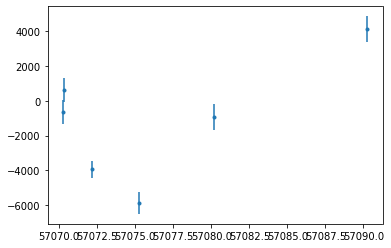

In [52]:
plt.figure()
plt.errorbar(df.midPointTai, df.psFlux, df.psFluxErr,fmt='.',ls='none')

/opt/lsst/software/stack/conda/miniconda3-py37_4.8.2/envs/lsst-scipipe-1a1d771/lib/python3.7/site-packages/ipykernel/__main__.py:4: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


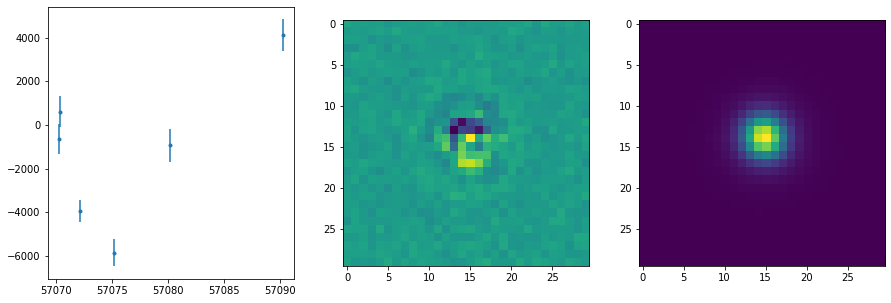

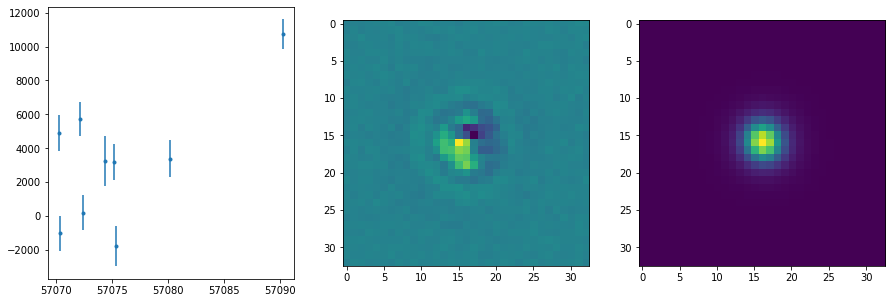

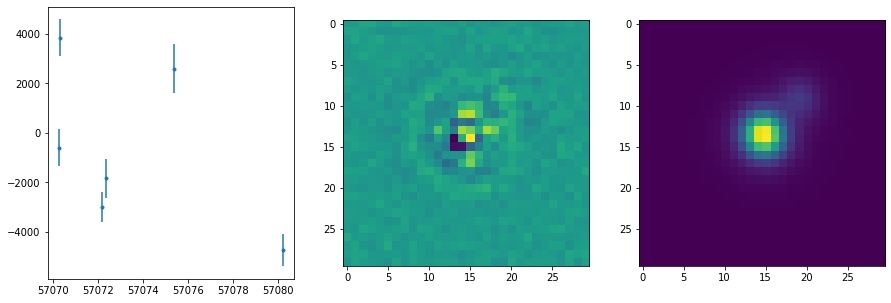

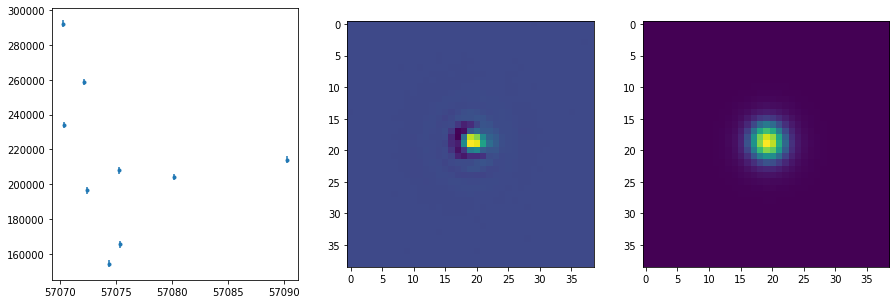

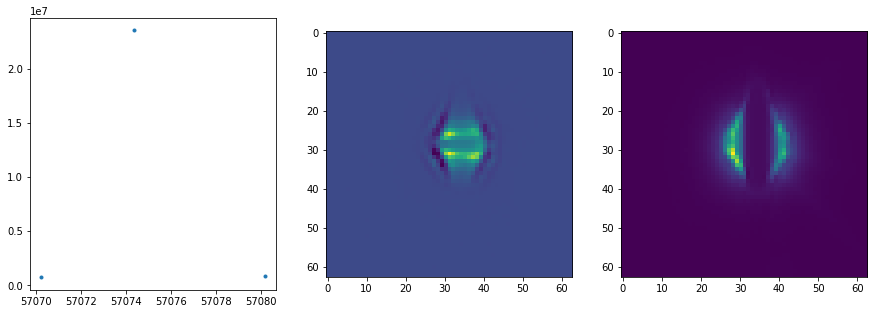

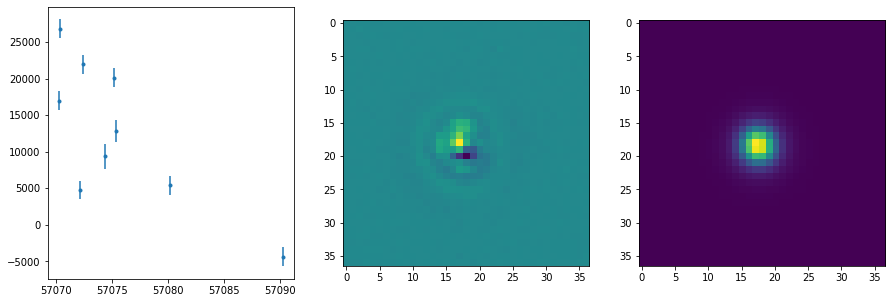

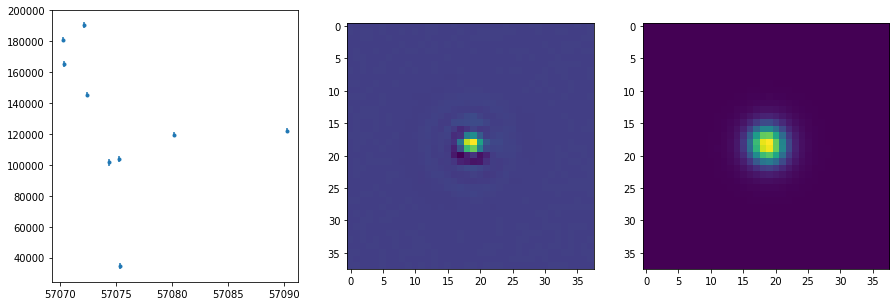

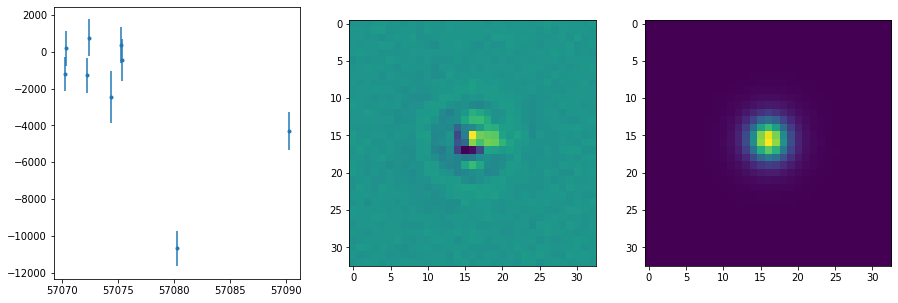

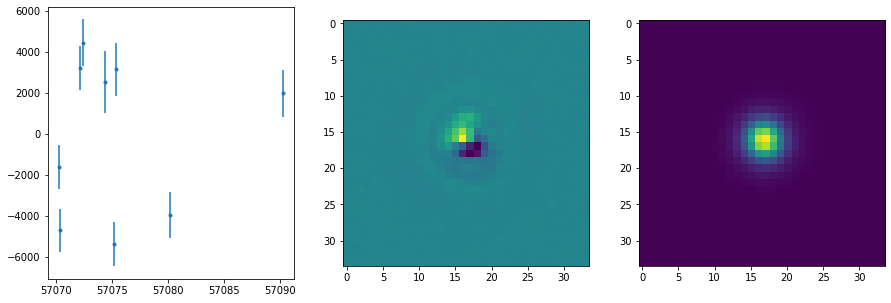

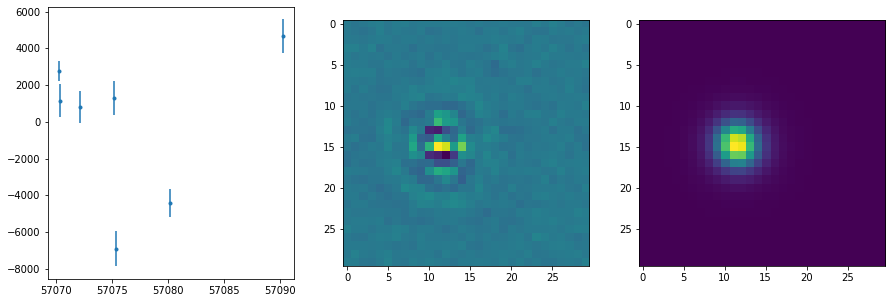

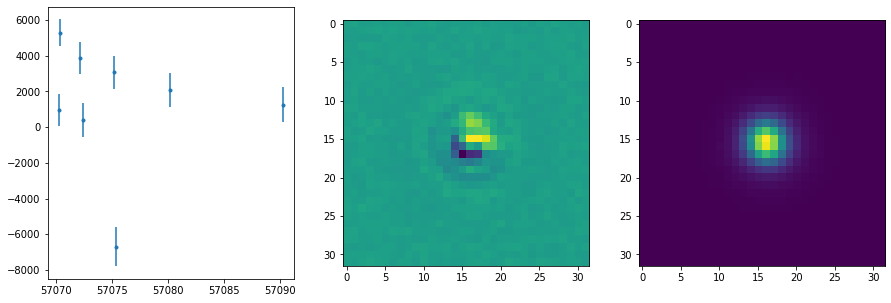

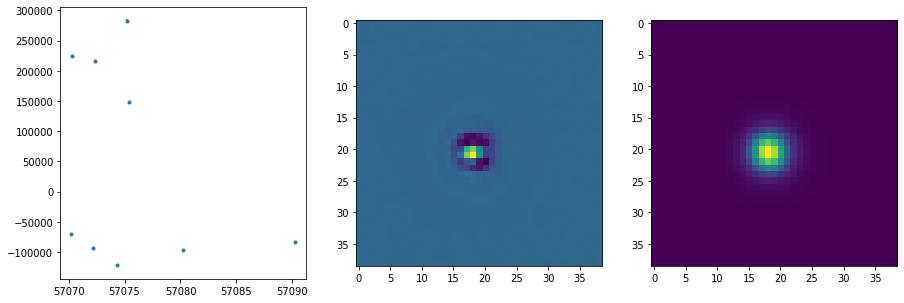

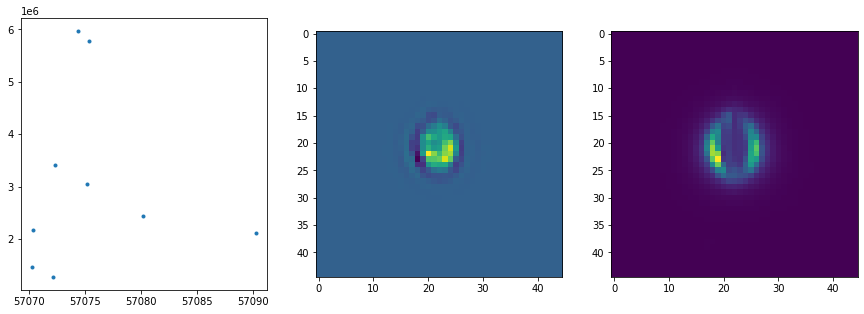

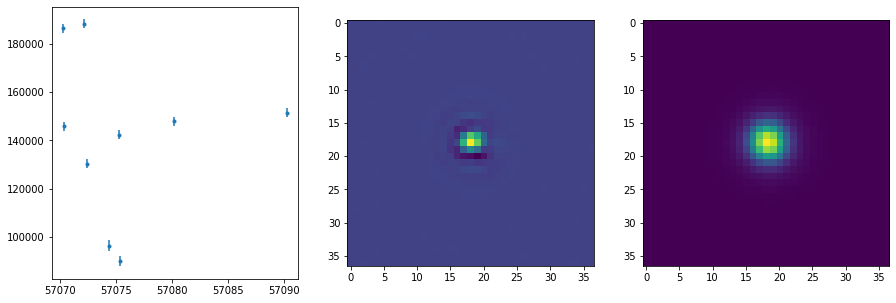

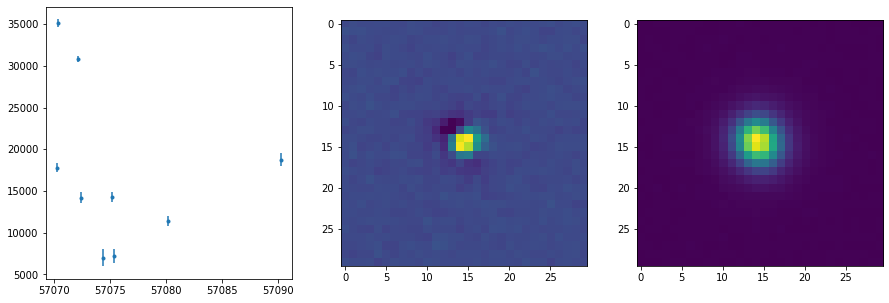

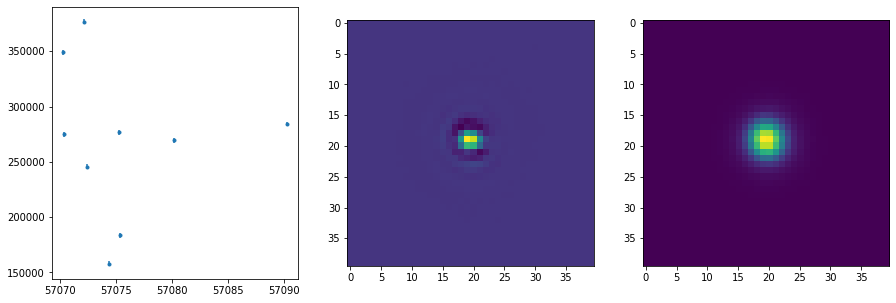

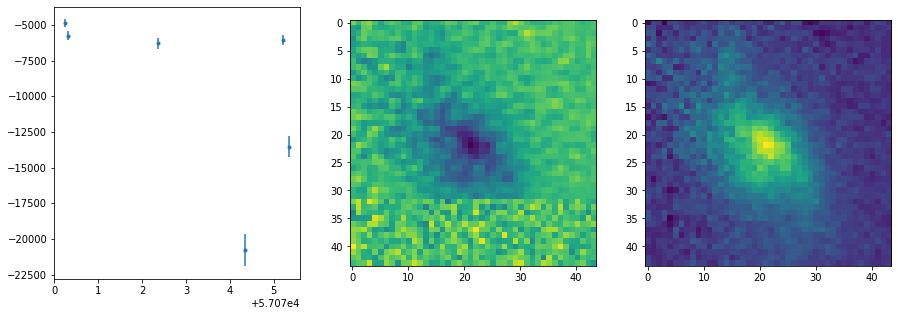

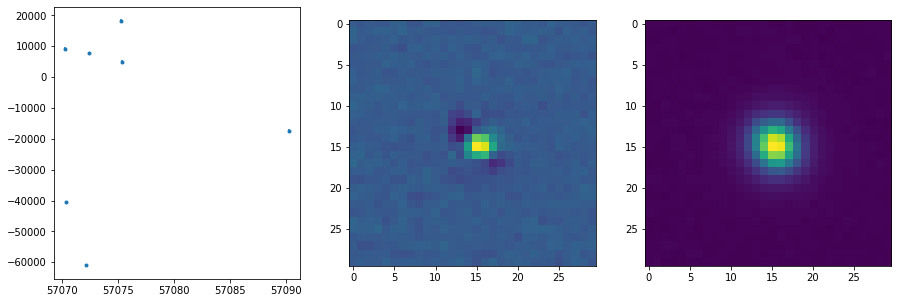

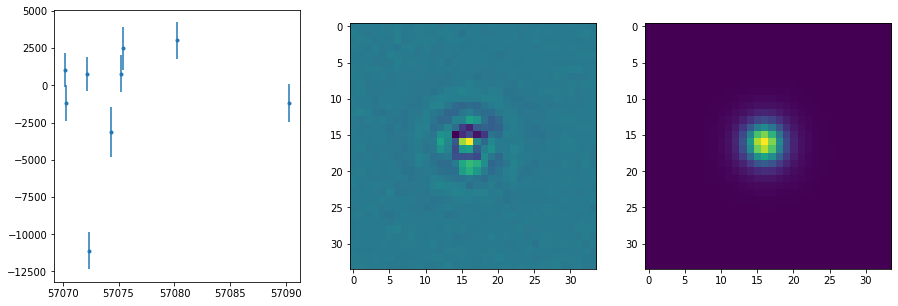

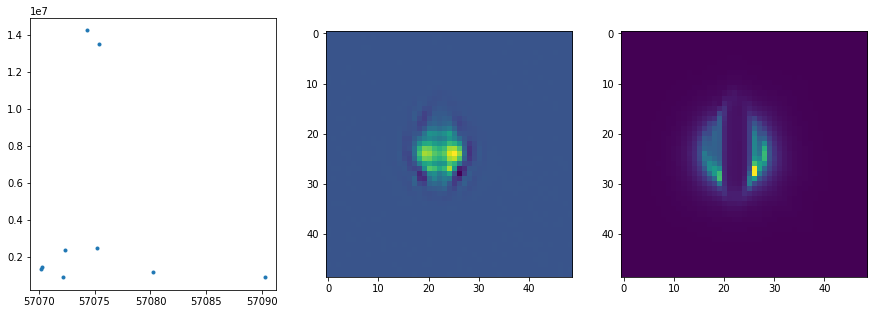

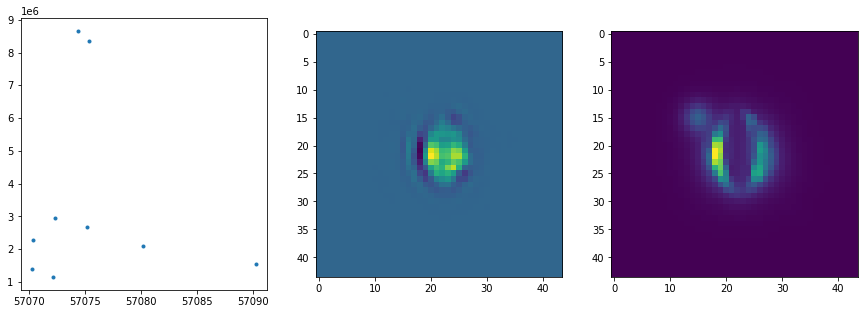

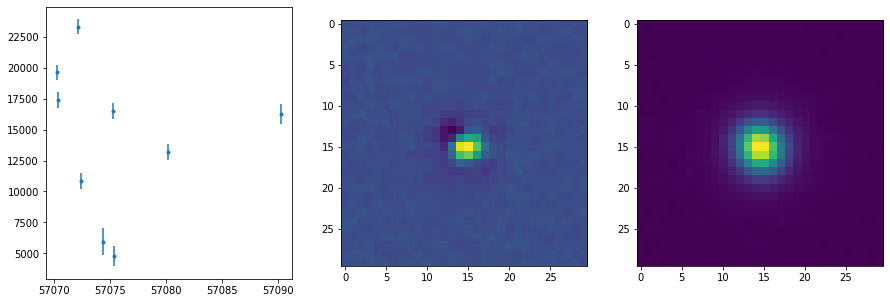

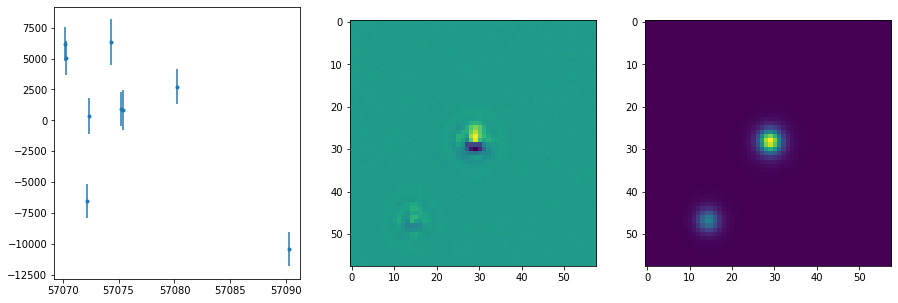

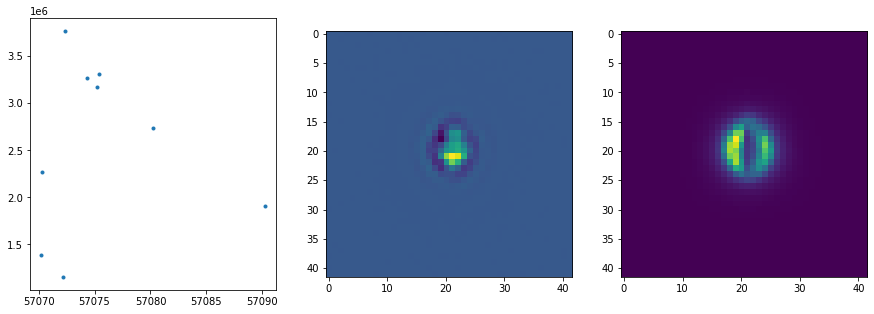

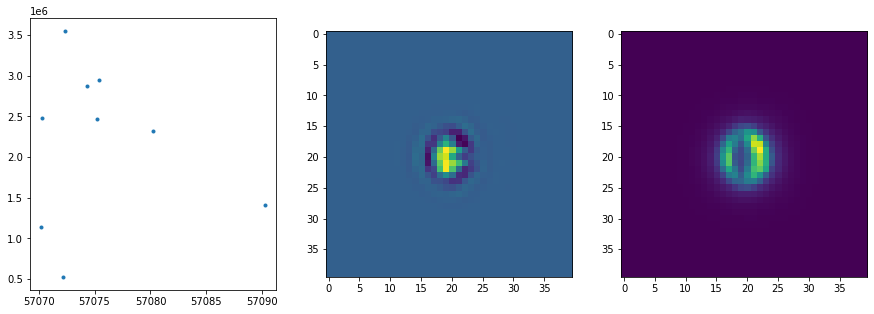

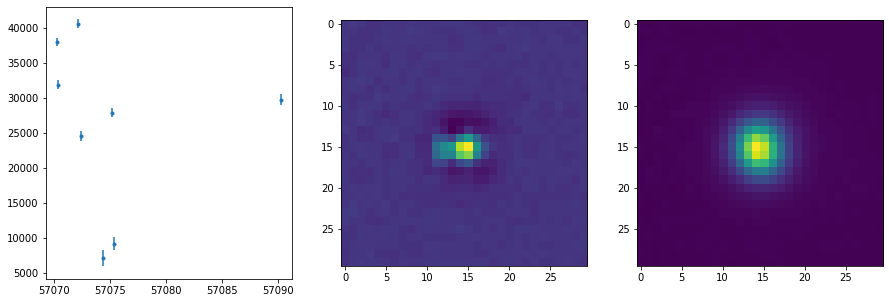

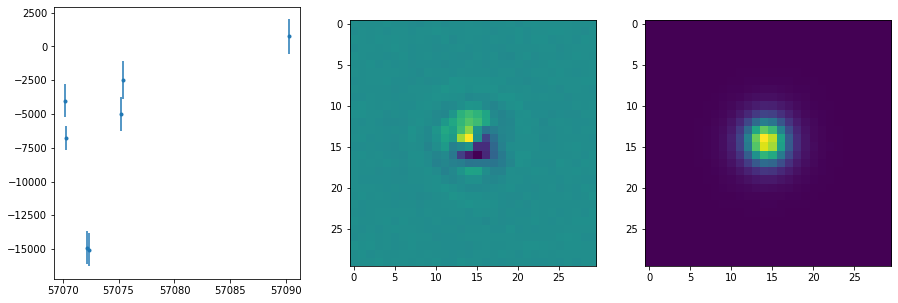

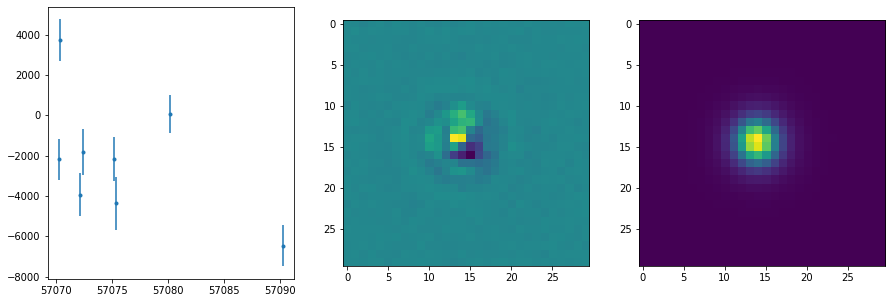

In [58]:
for packet in data:
    if packet['diaObject']['gPSFluxSigma'] > 3000:
        df = make_dataframe(packet)
        plt.figure(figsize=(15,5))
        plt.subplot(131)
        plt.errorbar(df.midPointTai, df.psFlux, df.psFluxErr,fmt='.',ls='none')
        cutoutDifference, cutoutTemplate = read_cutout_images(packet)
        plt.subplot(132)
        plt.imshow(cutoutDifference.data)
        plt.subplot(133)
        plt.imshow(cutoutTemplate.data)

In [61]:
%%time
n_alerts = []
for avro_file in alert_files:
    with open(f'{avro_file}','rb') as f:
        writer_schema, data = schema.retrieve_alerts(f)
        #print(avro_file.split('/')[-1], len(data))
        n_alerts.append(len(data))

print(f'{np.sum(n_alerts)} total alerts!')

41098723.avro 121
41225032.avro 105
41207433.avro 28


KeyboardInterrupt: 